# 3-1.

In [ ]:
import seaborn as sns

df = sns.load_dataset('Penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [24]:
df['species'].unique

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [41]:
cond = df['species'] == 'Gentoo'

gentoo_data = df.loc[cond]
gentoo_data = gentoo_data.dropna()
gentoo_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [74]:
import matplotlib.pyplot as plt

# plt.scatter(gentoo_data['bill_length_mm'], gentoo_data['bill_depth_mm'])

In [75]:
# plt.scatter(gentoo_data['bill_length_mm'], gentoo_data['flipper_length_mm'])

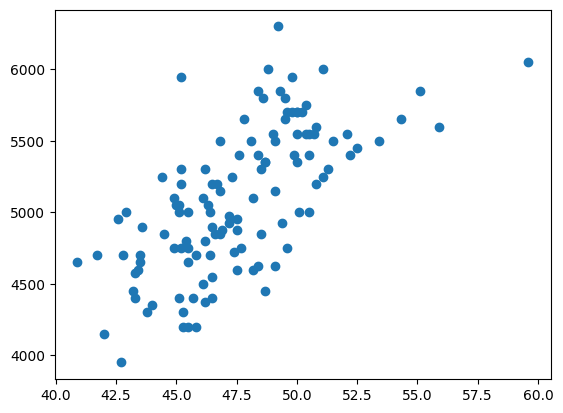

In [44]:
plt.scatter(gentoo_data['bill_length_mm'], gentoo_data['body_mass_g'])

In [76]:
# plt.scatter(gentoo_data['bill_depth_mm'], gentoo_data['flipper_length_mm'])

In [77]:
# plt.scatter(gentoo_data['bill_depth_mm'], gentoo_data['body_mass_g'])

In [78]:
# plt.scatter(gentoo_data['flipper_length_mm'], gentoo_data['body_mass_g'])

In [79]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(gentoo_data[['bill_length_mm']], gentoo_data[['body_mass_g']])

In [80]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.33300979262672803

In [81]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

289.0


In [82]:
knr.score(train_input, train_target)

0.5459849201085603

In [83]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.6385903706421365
0.1818956413210442


# 3-2.

In [89]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(gentoo_data[['bill_length_mm']], gentoo_data[['body_mass_g']])

In [90]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(test_input, test_target)

0.399294046095631

In [91]:
lr.predict([[60]])

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6373.70631092]])

In [94]:
lr.coef_[0][0]

np.float64(100.18838570171728)

In [95]:
lr.intercept_[0]

np.float64(362.40316881508716)

[[100.1883857]] [362.40316882]


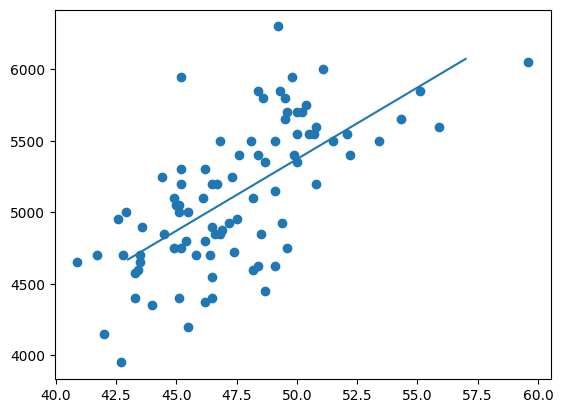

In [107]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
print(lr.coef_, lr.intercept_)
plt.plot([43, 57], [43 * lr.coef_[0][0] + lr.intercept_[0], 57 * lr.coef_[0][0] + lr.intercept_[0]])

In [109]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.4432604163445971
0.399294046095631


In [110]:
train_input['bill_length_mm_poly'] = train_input['bill_length_mm'] ** 2
test_input['bill_length_mm_poly'] = test_input['bill_length_mm'] ** 2

In [111]:
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(test_input, test_target)

0.4004666870564868

In [112]:
lr.predict([[50, 2500]])

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5397.8222663]])

In [113]:
print(lr.coef_, lr.intercept_)

[[343.64122777  -2.50308471]] [-5526.52734996]


In [114]:
gentoo_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [116]:
gentoo_full = gentoo_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
gentoo_mass = gentoo_data[['body_mass_g']]

In [120]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(gentoo_full, gentoo_mass)

In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(89, 9)

In [123]:
poly.get_feature_names_out()

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'bill_length_mm^2', 'bill_length_mm bill_depth_mm',
       'bill_length_mm flipper_length_mm', 'bill_depth_mm^2',
       'bill_depth_mm flipper_length_mm', 'flipper_length_mm^2'],
      dtype=object)

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.6931756392035189

In [125]:
test_poly = poly.transform(test_input)
lr.score(test_poly, test_target)

0.5677411378766186

In [133]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(89, 55)

In [134]:
lr.fit(train_poly, train_target)

LinearRegression()

In [135]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8381008705952991
-0.20894652434329775


In [136]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [137]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.6769130343835634
0.583760454026137


In [138]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.6788302492901598
0.5825678434329481


C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+05, tolerance: 2.138e+03
  model = cd_fast.enet_coordinate_descent(


In [140]:
lasso.coef_

array([ 247.53445218,  640.35082944,  409.16655412,   76.59308274,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   62.95440753,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,   27.90246461,
          0.        ,    0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,  -83.12207471, -170.10732894,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
        -21.87066162,   -0.        ,   52.6128605 ,    0.        ,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        , -228.50805274,  -44.66444923,   -0.        ,
         -0.        ,  -91.80084775, -244.13948263,   -5.42421027,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
        -75.10692853,   -0.        ,    0.        ])